In [24]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import numpy.linalg as LA


In [25]:
## Example 5.2
def Hilbert(n):
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = 1/(i+j+1)
    return A

def E(n):
    epis= math.pow(10, -3)
    E= np.ones((n, n))*epis
    return E

def norm_2(A):
    w,v=LA.eig(A.T @ A)
    return math.sqrt(max(w))

def calculate_all(n):
    lamb = max(LA.eig(Hilbert(n))[0])
    mu = max(LA.eig(Hilbert(n)+E(n))[0])
    print("------------------------")
    print("n= "+str(n))
    print("Absolute error is %.9f" % np.absolute(lamb-mu))
    print("Relative error is %.9f" % np.absolute((lamb-mu)/lamb))
    print("2_norm of E_n is  %.9f" % norm_2(E(n)))
    Hn_inv = LA.inv(Hilbert(n))
    K_2_Hn=norm_2(Hilbert(n))*norm_2(Hn_inv)
    print("K_2 of Hn is %.9f" % K_2_Hn)
    HE_inv = LA.inv(Hilbert(n)+E(n))
    K_2_HE=norm_2(Hilbert(n)+E(n))*norm_2(HE_inv)
    print("K_2 of Hn+En is %.9f" % K_2_HE)

calculate_all(1)
calculate_all(2)
calculate_all(4)
calculate_all(8)
calculate_all(10)


------------------------
n= 1
Absolute error is 0.001000000
Relative error is 0.001000000
2_norm of E_n is  0.001000000
K_2 of Hn is 1.000000000
K_2 of Hn+En is 1.000000000
------------------------
n= 2
Absolute error is 0.001832306
Relative error is 0.001445501
2_norm of E_n is  0.002000000
K_2 of Hn is 19.281470068
K_2 of Hn+En is 19.260212294
------------------------
n= 4
Absolute error is 0.003310863
Relative error is 0.002206927
2_norm of E_n is  0.004000000
K_2 of Hn is 15513.738738934
K_2 of Hn+En is 15466.722125017
------------------------
n= 8
Absolute error is 0.005928739
Relative error is 0.003495845
2_norm of E_n is  0.008000000
K_2 of Hn is 15257576321.957935333
K_2 of Hn+En is 15153360687.370664597
------------------------
n= 10
Absolute error is 0.007143814
Relative error is 0.004077706
2_norm of E_n is  0.010000000
K_2 of Hn is 16026019477413.042968750
K_2 of Hn+En is 15887961031160.035156250


A's eigenvalue is 0.512085 14.102556 10.385359 

iter is 72 ,  posteriori erro of eigenvalue is 3.65465e-10
Absolute error of eigenvalue is 2.23409e-10
Absolute error of eigenvector is 6.9161e-11

if we take z_0=x_2+x_3
iter is 215 ,  posteriori erro of eigenvalue is 5.24399e-15
Absolute error of eigenvalue is 1.24345e-14
Absolute error of eigenvector is 4.42569e-16
iter is 103 ,  posteriori erro of eigenvalue is 2.65522e-14


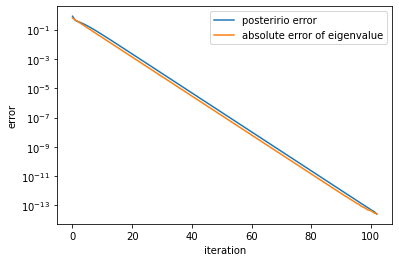

In [26]:
## Example 5.3
def power_method(A, z_0, tol, nmax):
    q = z_0/LA.norm(z_0)
    q_2 = q.T
    relres = tol+1
    z = A @ q
    iteration = 0
    lamb = 0
    while (relres >= tol) & (iteration <= nmax):
        q = z/LA.norm(z)
        z = A @ q
        lamb = q.T @ z
        x = q
        z_2 = q_2 @ A
        q_2 = z_2/LA.norm(z_2)
        q_2 = q_2
        y1 = q_2
        costheta = np.abs(y1 @ x)

        if costheta >= 5e-2:
            iteration = iteration+1
            temp = LA.norm(z-lamb * q)/costheta
            relres=temp
            
        else: print("multiple eigenvalue")
        # print("iter is %d ,  posteriori erro of eigenvalue is %g" % (iteration,relres))
    
    print("iter is %d ,  posteriori erro of eigenvalue is %g" % (iteration,relres))
    return lamb,q


A = np.array([[15, -2, 2], [1, 10, -3], [-2, 1, 0]])
V=np.array([[-0.944,-0.312,0.112],[0.393,0.919,0.013],[-0.088,0.309,0.947]]).T
print("A's eigenvalue is %f %f %f " % (LA.eig(A)[0][0] ,LA.eig(A)[0][1] ,LA.eig(A)[0][2]) +"\n")
z_0 = np.array([1, 1, 1]).reshape(3, 1)
lamb,x_1=power_method(A,z_0,4.8e-10,200)
w,v=LA.eig(A)
print("Absolute error of eigenvalue is %g" % np.abs(np.max(w)-lamb))
print("Absolute error of eigenvector is %g" % LA.norm(v[:,1].reshape(-1,1)+x_1) +"\n" )
print("if we take z_0=x_2+x_3")
z_0=(V[1,:]+V[2,:]).reshape(3,1)
lamb,x_1=power_method(A,z_0,2e-20,214)
print("Absolute error of eigenvalue is %g" % np.abs(np.max(w)-lamb))
print("Absolute error of eigenvector is %g" % LA.norm(v[:,1].reshape(-1,1)-x_1))


################## plot
def power_method_record(A, z_0, tol, nmax):
    w,v=LA.eig(A)
    q = z_0/LA.norm(z_0)
    q_2 = q.T
    relres = tol+1
    z = A @ q
    iteration = 0
    lamb = 0
    record_post=[]
    record_abs=[]
    while (relres >= tol) & (iteration <= nmax):
        q = z/LA.norm(z)
        z = A @ q
        lamb = q.T @ z
        x = q
        z_2 = q_2 @ A
        q_2 = z_2/LA.norm(z_2)
        q_2 = q_2
        y1 = q_2
        costheta = np.abs(y1 @ x)

        if costheta >= 5e-2:
            iteration = iteration+1
            temp = LA.norm(z-lamb * q)/costheta
            relres=temp
            record_post.append(relres)
            record_abs.append( np.abs(np.max(w)-lamb))
        else: print("multiple eigenvalue")
        # print("iter is %d ,  posteriori erro of eigenvalue is %g" % (iteration,relres))
    
    print("iter is %d ,  posteriori erro of eigenvalue is %g" % (iteration,relres))
    return record_post,record_abs

A = np.array([[15, -2, 2], [1, 10, -3], [-2, 1, 0]])
z_0 = np.array([1, 1, 1]).reshape(3, 1)
record_post,record_abs=power_method_record(A, z_0, 3e-14, 200)

fig,ax1=plt.subplots()
plt.plot(np.squeeze(np.array(record_post)),label="posteririo error")
plt.plot(np.squeeze(np.array(record_abs)),label="absolute error of eigenvalue")
plt.xlabel('iteration')
plt.ylabel('error')
ax1.set_yscale('log')
plt.legend()
plt.show()

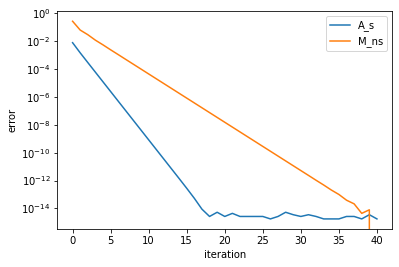

In [27]:
## Example 5.3
## compare sysmetric and non-sysmetric matrix
def power_compare_sys(A, z_0, tol, nmax):
    A_s = np.array([[1, 3, 4], [3, 1, 2], [4, 2, 1]])
    w, v = LA.eig(A_s)
    lamb_1 = np.max(w)
    q = z_0/LA.norm(z_0)
    q_2 = q.T
    relres = tol+1
    z = A @ q
    iteration = 0
    lamb = 0
    record = []
    while (relres >= tol) & (iteration <= nmax):
        q = z/LA.norm(z)
        z = A @ q
        lamb = q.T @ z
        x = q
        z_2 = q_2 @ A
        q_2 = z_2/LA.norm(z_2)
        q_2 = q_2
        y1 = q_2
        costheta = np.abs(y1 @ x)

        if costheta >= 5e-2:
            iteration = iteration+1
            temp = LA.norm(z-lamb * q)/costheta
            relres = temp
            record.append(np.abs(lamb_1-lamb))
        else:
            print("multiple eigenvalue")
    return record


A_s = np.array([[1, 3, 4], [3, 1, 2], [4, 2, 1]])
T = np.array([[8, 1, 6], [3, 5, 7], [4, 9, 2]])
M_ns = LA.inv(T) @ A_s @ T
w, v = LA.eig(A_s)
lamb_1 = np.max(w)
z_0 = np.array([1, 1, 1]).reshape(3, 1)
Record_As = power_compare_sys(A_s, z_0, 4.8e-15, 40)
Record_Mns = power_compare_sys(M_ns, z_0, 4.8e-15, 40)


fig, ax1 = plt.subplots()
plt.plot(np.squeeze(np.array(Record_As)), label="A_s")
plt.plot(np.squeeze(np.array(Record_Mns)), label="M_ns")
plt.xlabel('iteration')
plt.ylabel('error')
ax1.set_yscale('log')
plt.legend()
plt.show()


In [28]:
## Example 5.3
## inverse power method
from scipy.linalg import lu
A = np.array([[15, -2, 2], [1, 10, -3], [-2, 1, 0]])
z_0 = np.array([1, 1, 1]).reshape(3, 1)/math.sqrt(3)

def inverse_power(A, z_0, mu, tol, nmax):
    M = A-mu*np.eye(A.shape[0])
    P, L, U = lu(A)
    q = z_0/LA.norm(z_0)
    q_2 = q.T
    sigma = 0
    relres = tol+1
    iter = 0
    x=np.zeros(z_0.shape)
    while(relres >= tol) & (iter <= nmax):
        iter = iter+1
        b = P @ q
        y = LA.inv(L) @ b
        z=LA.inv(U) @ y
        q=z/LA.norm(z)
        z=A @ q
        sigma=q.T @ z
        b=q_2.T
        y=LA.inv(U.T) @ b
        w=LA.inv(L.T) @ y
        q_2=w.T @ P 
        q_2=q_2/LA.norm(q_2)
        costheta=np.abs(q_2 @ q)
        if costheta>= 5e-2:
            temp=LA.norm(z-sigma*q)/costheta
            relres=temp
        x=q
    print("iter is %d , relres is %g" % (iter,relres))
    return sigma,x
sigma,x=inverse_power(A,z_0,0,3e-15,9)
w,v=LA.eig(A)
print("Absolute error of eigenvalue is %g" % np.abs(w[0]-sigma))
print("Absolute error of eigenvector is %g" % LA.norm(v[:,0].reshape(3,1)-x))

iter is 10 , relres is 3.05641e-13
Absolute error of eigenvalue is 5.9508e-14
Absolute error of eigenvector is 2.67485e-14


In [29]:
## Example 5,4
def modified_GS(A):
    Q,R=np.zeros(A.shape),np.zeros(A.shape)
    n=A.shape[0]
    Q[:,0]=A[:,0]
    for k in range(n):
        R[k,k]=LA.norm(A[:,k])
        Q[:,k]=A[:,k]/R[k,k]
        for j in range(k+1,n):       
            R[k,j]=Q[:,k].T @ A[:,j]           
            A[:,j]=A[:,j]-Q[:,k]*R[k,j]
    return Q,R

def bacis_QR(A,nmax):
    T=A
    for iter in range(nmax):
        Q,R=modified_GS(T)
        T=R @ Q
    return T
    
A=np.zeros((4,4))
for i in range(4):
    A[i,i]=4
for i in range(4):
    for j in range(i+1,4):
        A[i,j]=4+i-j
for j in range(4):
    for i in range(j+1,4):
        A[i,j]=4-i+j
print("A is")
print(A)  
print("\n")  
print("after 20 iter basic QR iteration")
T=bacis_QR(A,20)
print(T)

A is
[[4. 3. 2. 1.]
 [3. 4. 3. 2.]
 [2. 3. 4. 3.]
 [1. 2. 3. 4.]]


after 20 iter basic QR iteration
[[ 1.10990195e+01  6.44596885e-10 -3.26830832e-15  8.37024233e-15]
 [ 6.44596522e-10  3.41421356e+00  1.42864767e-11  1.27879991e-15]
 [ 1.74359452e-21  1.42861613e-11  9.00980444e-01  1.16034869e-04]
 [ 2.31847597e-25  2.67693034e-15  1.16034869e-04  5.85786480e-01]]


In [31]:
## Example 5.5
x = np.array([1, 1, 1, 1],dtype=float).reshape(-1,1)
P = 1/6*np.array([[5, -1, -3, -1], [-1, 5, -3, -1],
                  [-3, -3, -3, -3], [-1, -1, -3, 5]], dtype=float)
v=np.array([1,1,3,1],dtype=float).reshape(-1,1)
P_v=np.eye(4)-2*v@v.T/LA.norm(v)**2
print("P calculated by v is")
print(P_v*6)
print("After Householder x becomes")
print(P@x)

P calculated by v is
[[ 5. -1. -3. -1.]
 [-1.  5. -3. -1.]
 [-3. -3. -3. -3.]
 [-1. -1. -3.  5.]]
After Householder x becomes
[[-5.55111512e-17]
 [ 0.00000000e+00]
 [-2.00000000e+00]
 [ 0.00000000e+00]]


In [32]:
x = np.array([1, 2, 3, 4, 5], dtype=float).reshape(5, 1)
norm_w = LA.norm(x[1:])

y = np.array([1, norm_w, 0, 0, 0]).reshape(5, 1)
y_cat = y[1:]
x_cat = x[1:]
v = (y_cat-x_cat)/LA.norm(y_cat-x_cat)

P = np.zeros((5, 5))
P[0, 0] = 1
P[1:, 1:] = np.eye(4)-2*v@v.T
print(" P calculated by x and y is")
print(P)
print("Verification Px=y")
print(P@x)


 P calculated by x and y is
[[ 1.          0.          0.          0.          0.        ]
 [ 0.          0.27216553  0.40824829  0.54433105  0.68041382]
 [ 0.          0.40824829  0.77101021 -0.30531973 -0.38164966]
 [ 0.          0.54433105 -0.30531973  0.59290703 -0.50886621]
 [ 0.          0.68041382 -0.38164966 -0.50886621  0.36391724]]
Verification Px=y
[[ 1.00000000e+00]
 [ 7.34846923e+00]
 [-4.44089210e-16]
 [ 0.00000000e+00]
 [ 2.22044605e-16]]
